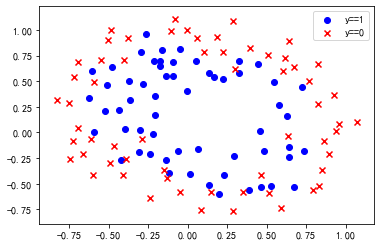

In [3]:
from numpy import loadtxt,where
from pylab import scatter, show, legend, xlabel, ylabel
 
#load the dataset
data = loadtxt("ex2data2.txt", delimiter=",")
#print(data)
 
X = data[:,0:2]
y = data[:, 2]
 
pos = where(y == 1)
#pos是y中数据等于1的下标索引
neg = where(y==0)
#neg是y中数据等于0的下标索引
 
#python中数据可视化函数scatter(数据的横坐标向量，数据的纵坐标向量，marker='0'数据以点的形式显示，c='b'数据点是blue颜色)
scatter(X[pos,0],X[pos, 1],marker='o', c='b')
scatter(X[neg,0],X[neg, 1],marker='x', c='r')
 
legend(["y==1","y==0"])
show()

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

def loadDataSet():
    # load the dataset
    data = loadtxt("ex2data2.txt", delimiter=",")
    # 拿到X和y
    y = np.c_[data[:, 2]]
    X = data[:, 0:2]
    return data,X,y
 
def map_feature(x1, x2):
    '''''
    Maps the two input features to polonomial features.
    Returns a new feature array with more features of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    '''
    x1.shape =(x1.size,1)
    x2.shape =(x2.size,1)
    degree =6
    mapped_fea = ones(shape=(x1[:,0].size,1))
    for i in range(1, degree +1):
        for j in range(i +1):
            r =(x1 **(i - j))*(x2 ** j)
            mapped_fea = append(mapped_fea, r, axis=1)
    return mapped_fea
 
#计算Sigmoid函数
def sigmoid(X):
    '''Compute sigmoid function'''
    den = 1.0 + exp(-1.0*X)
    gz = 1.0/den
    return gz
 
# 定义损失函数
def costFunctionReg(theta, X, y, l):
    m = y.size
    h = sigmoid(X.dot(theta))
 
    J = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + (l / (2.0 * m)) * np.sum(np.square(theta[1:]))
 
    if np.isnan(J[0]):
        return (np.inf)
    return (J[0])
 
#计算梯度
def compute_grad(theta, X, y, l):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
 
    grad = (1.0 / m) * X.T.dot(h - y) + (l / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
 
    return (grad.flatten())
 
#梯度
def gradAscent(XX, y, l):
    initial_theta = np.zeros(XX.shape[1])
    cost = costFunctionReg(initial_theta, XX, y, l)
    print('Cost: \n', cost)
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(XX, y, l), jac=compute_grad, options={'maxiter': 3000})
    return res2

In [2]:
def plotBestFit(data,res2,X,accuracy,l,axes):  #画出最终分类的图
    # 对X,y的散列绘图
    plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes=None)
    # 画出决策边界
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(map_feature(xx1.ravel(), xx2.ravel()).dot(res2.x))
    h = h.reshape(xx1.shape)
    if axes == None:
        axes = plt.gca()
    axes.contour(xx1, xx2, h, [0.5], linewidths=1, colors='r');
    axes.set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), l))
    plt.show()

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:, 2] == 0
    pos = data[:, 2] == 1
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:, 0], data[pos][:, 1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:, 0], data[neg][:, 1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon=True, fancybox=True)

In [4]:
def predict(theta, X):
    '''''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m, n = X.shape
    p = zeros(shape=(m,1))
    h = sigmoid(X.dot(theta.T))
    for it in range(0, h.shape[0]):
        if h[it]>0.5:
            p[it,0]=1
        else:
            p[it,0]=0
    return p
 
def main():
    data, X, y = loadDataSet()
    #对给定的两个feature做一个多项式特征的映射
    mapped_fea = map_feature(X[:, 0], X[:, 1])
 
    # Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
    # Lambda = 1 : 正确的
    # Lambda = 100 :正则化项太激进，导致基本就没拟合出决策边界
    l = 1
 
    res = gradAscent(mapped_fea, y, l)
    #print(res)
 
    # 准确率
    accuracy = y[where(predict(res.x, mapped_fea) == y)].size / float(y.size)*100.0
    #画决策边界
    plotBestFit(data, res, X,  accuracy, l,axes=None)

Cost: 
 0.6931471805599453


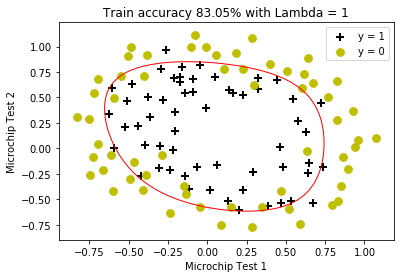

In [5]:
if __name__ == '__main__':
    main()

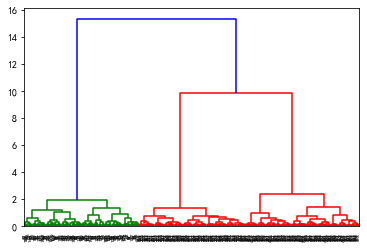

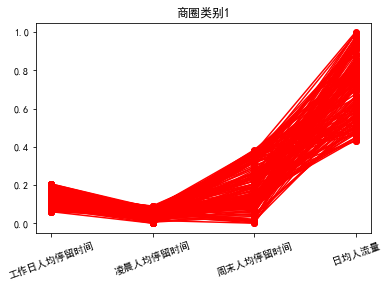

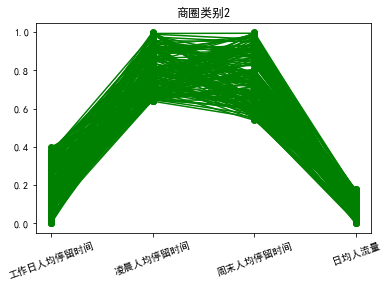

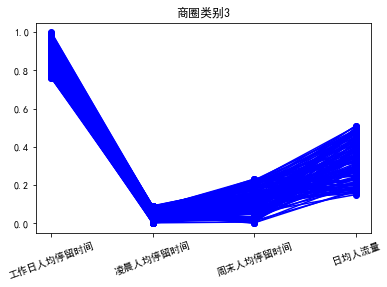

In [2]:
#基站定位数据的商圈
# 数据标准化到[0,1]
import pandas as pd

# 参数初始化
filename = 'business_circle.xls'  # 原始数据文件
standardizedfile = 'standardized.xls'  # 标准化后数据保存路径

data = pd.read_excel(filename, index_col=u'基站编号')  # 读取数据

data = (data - data.min()) / (data.max() - data.min())  # 离差标准化
data = data.reset_index()
data.to_excel(standardizedfile, index=False)  # 保存结果

# 参数初始化
standardizedfile = 'standardized.xls'  # 标准化后的数据文件
data = pd.read_excel(standardizedfile, index_col=u'基站编号')  # 读取数据


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# 这里使用scipy的层次聚类函数

Z = linkage(data, method='ward', metric='euclidean')  # 谱系聚类图
P = dendrogram(Z, 0)  # 画谱系聚类图
plt.show()

# 层次聚类算法

# 参数初始化
standardizedfile = 'standardized.xls'  # 标准化后的数据文件
k = 3  # 聚类数
data = pd.read_excel(standardizedfile, index_col=u'基站编号')  # 读取数据

from sklearn.cluster import AgglomerativeClustering  # 导入sklearn的层次聚类函数

model = AgglomerativeClustering(n_clusters=k, linkage='ward')
model.fit(data)  # 训练模型

# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)  # 详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别']  # 重命名表头


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

style = ['ro-', 'go-', 'bo-']
xlabels = [u'工作日人均停留时间', u'凌晨人均停留时间', u'周末人均停留时间', u'日均人流量']
#pic_output = 'd:/data/type_'  # 聚类图文件名前缀

for i in range(k):  # 逐一作图，作出不同样式
    plt.figure()
    tmp = r[r[u'聚类类别'] == i].iloc[:, :4]  # 提取每一类
    for j in range(len(tmp)):
        plt.plot(range(1, 5), tmp.iloc[j], style[i])

    plt.xticks(range(1, 5), xlabels, rotation=20)  # 坐标标签
    plt.title(u'商圈类别%s' % (i + 1))  # 我们计数习惯从1开始
    plt.subplots_adjust(bottom=0.15)  # 调整底部
   # plt.savefig(u'%s%s.png' % (pic_output, i + 1))  # 保存图片

In [10]:
from numpy import *
import numpy as np
import pandas as pd

# 线性回归
# 读取数据
data = pd.read_csv('Advertising.csv', index_col=0)

print('\n')
print('data head : ')
print(data.head())  # 数据前5行

print('\n')
print('data tail : ')
print(data.tail())  # 数据后5行

# 画散点图
import seaborn as sns
import matplotlib.pyplot as plt

# # 单显示数据
# sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.8)
#
# # 加上回归线
# sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.8, kind='reg')
#
# x = data[['TV', 'Radio', 'Newspaper']]
# y = data['Sales']
# plt.figure(figsize=(9, 12))
# plt.subplot(311)
# plt.plot(data['TV'], y, 'ro')
# plt.title('TV')
# plt.grid()
# plt.subplot(312)
# plt.plot(data['Radio'], y, 'g^')
# plt.title('Radio')
# plt.grid()
# plt.subplot(313)
# plt.plot(data['Newspaper'], y, 'b*')
# plt.title('Newspaper')
# plt.grid()
# plt.tight_layout()
# plt.show()

# 计算相关系数矩阵
print('\n')
print('相关矩阵：')
print(data.corr())

# 构建X、Y数据集
X = data[['TV', 'Radio', 'Newspaper']]
print('\n')
print('X-head : ')
print(X.head())

y = data['Sales']
print('\n')
print('Y-head : ')
print(y.head())


# 根据系数矩阵公式计算
def standRegres(xArr, yArr):
    # 转化为矩阵
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:  # 判断行列式是不是0，是奇异矩阵的话就不能求逆
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)  # I是矩阵的逆
    return ws


# 求解回归方程系数
X2 = X
X2['intercept'] = [1] * 200  # 原始自变量数据增加一列全1的截距项，变为4列
print('\n')
print('根据系数矩阵公式计算的四个参数：\n', standRegres(X2, y))

# 利用现有库求解
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X, y)

print('\n')
print('库函数计算的参数：', linreg.coef_)
print('库函数计算的截距：', linreg.intercept_)

print(zip(['TV', 'Radio', 'Newspaper'], linreg.coef_))

# 测试集和训练集的构建，交叉验证
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

# 结果
print('\n')

print('交叉验证计算的系数：', linreg.coef_)

print('交叉验证计算的截距：', linreg.intercept_)

print(zip(['TV', 'Radio', 'Newspaper'], linreg.coef_))

# 预测
y_pred = linreg.predict(X_test)

# 误差评估
from sklearn import metrics

print('\n')
print('三元参数模型评估：')

# 误差取绝对值的均值
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# 误差的平方的均值
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# MSE的开方
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 只选择电视和广播的数据训练，报纸作用不大剔除
feature_cols = ['TV', 'Radio']

X = data[feature_cols]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print('\n')
print('二元参数模型评估：')

# 对比模型性能
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

print("MSE:", metrics.mean_squared_error(y_test, y_pred))

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




data head : 
      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


data tail : 
        TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4


相关矩阵：
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


X-head : 
      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


Y-head : 
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64


根据系数矩阵公式计算的四个参数：
 [[ 